Accuracy of logistic regression model: 0.9999903842455479
classification report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    103447
         1.0       1.00      1.00      1.00       549

    accuracy                           1.00    103996
   macro avg       1.00      1.00      1.00    103996
weighted avg       1.00      1.00      1.00    103996



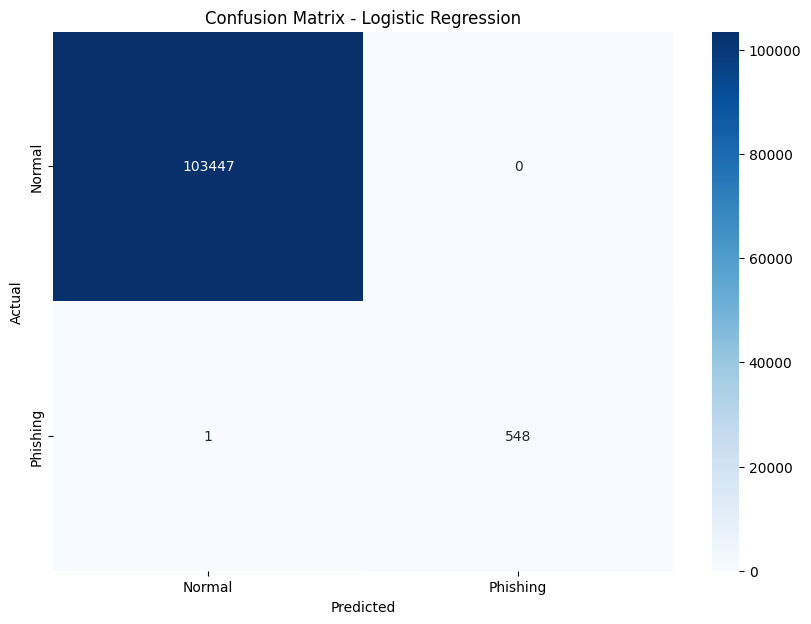

The logistic regression model is saved to a file: /Users/jiaoyihan/capstone/capstone_project/Logistic_Regression_model.pkl


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# 加载合并后的数据集
combined_data_path = '/Users/jiaoyihan/capstone/capstone_project/Combined_emails_ngram.csv'
combined_data = pd.read_csv(combined_data_path)

# 用特定值（如平均值）填充缺失值
imputer = SimpleImputer(strategy='mean')
combined_data_imputed = imputer.fit_transform(combined_data)

# 转换为DataFrame
combined_data = pd.DataFrame(combined_data_imputed, columns=combined_data.columns)

# 划分特征和标签
X = combined_data.drop(columns=['label'])
y = combined_data['label']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化并训练逻辑回归模型
model = LogisticRegression(max_iter=5000)  # 增加max_iter的值
model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = model.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of logistic regression model: {accuracy}")

# 打印分类报告
print("classification report:")
print(classification_report(y_test, y_pred))

# 生成混淆矩阵
cm = confusion_matrix(y_test, y_pred)

# 绘制混淆矩阵的热力图
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Phishing'], yticklabels=['Normal', 'Phishing'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# 保存训练好的模型
model_path = '/Users/jiaoyihan/capstone/capstone_project/Logistic_Regression_model.pkl'
joblib.dump(model, model_path)
print(f"The logistic regression model is saved to a file: {model_path}")


Accuracy of logistic regression model: 0.9999903842455479
Classification report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    103447
         1.0       1.00      1.00      1.00       549

    accuracy                           1.00    103996
   macro avg       1.00      1.00      1.00    103996
weighted avg       1.00      1.00      1.00    103996

AUC: 0.9995051450807602


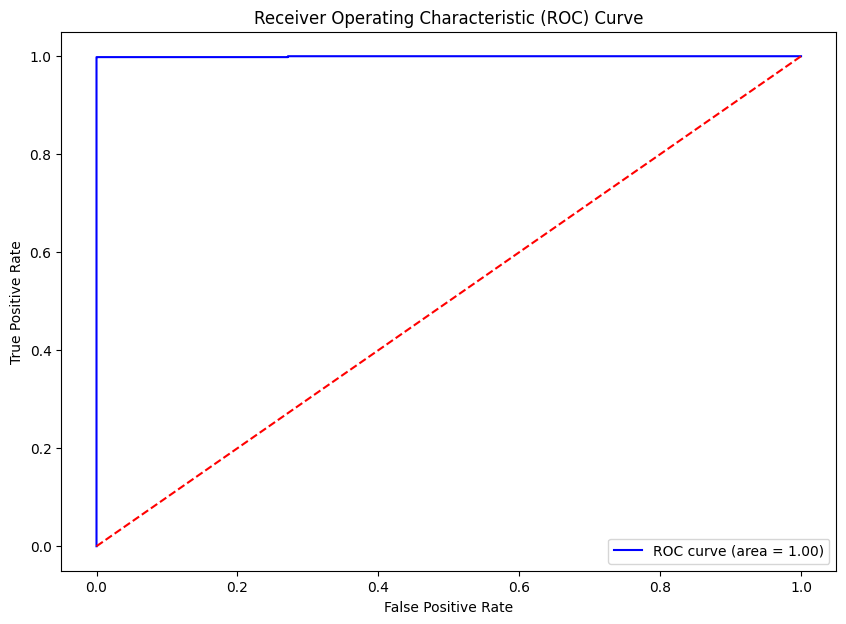

The logistic regression model is saved to a file: /Users/jiaoyihan/capstone/capstone_project/Logistic_Regression_model.pkl


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import joblib

# 加载合并后的数据集
combined_data_path = '/Users/jiaoyihan/capstone/capstone_project/Combined_emails_ngram.csv'
combined_data = pd.read_csv(combined_data_path)

# 用特定值（如平均值）填充缺失值
imputer = SimpleImputer(strategy='mean')
combined_data_imputed = imputer.fit_transform(combined_data)

# 转换为DataFrame
combined_data = pd.DataFrame(combined_data_imputed, columns=combined_data.columns)

# 划分特征和标签
X = combined_data.drop(columns=['label'])
y = combined_data['label']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化并训练逻辑回归模型
model = LogisticRegression(max_iter=5000)  # 增加max_iter的值
model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred_prob = model.predict_proba(X_test)[:, 1]  # 获取预测概率

# 计算准确率
accuracy = accuracy_score(y_test, (y_pred_prob > 0.5).astype(int))
print(f"Accuracy of logistic regression model: {accuracy}")

# 打印分类报告
print("Classification report:")
print(classification_report(y_test, (y_pred_prob > 0.5).astype(int)))

# 计算AUC
auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC: {auc}")

# 生成ROC曲线的数据
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# 绘制ROC曲线
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# 保存训练好的模型
model_path = '/Users/jiaoyihan/capstone/capstone_project/Logistic_Regression_model.pkl'
joblib.dump(model, model_path)
print(f"The logistic regression model is saved to a file: {model_path}")
